## Predict

In [43]:
# locad model with picle
import pickle


with open('model/model_life_expectancy_edaix.pkl', 'rb') as f:
    pipeline, model_estimator, columns, country, status = pickle.load(f)

In [44]:
columns

array(['adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'], dtype=object)

In [48]:
model_estimator

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
import numpy as np
import pandas as pd

In [50]:
# Cargamos la informacion desde un archivo csv y generamos un dataframe
df_concrete = pd.read_csv('./data/Life_Expectancy_Data.csv')

In [51]:
# eliminar espacios y pasar nombres a minusculas de las columnas
df_concrete.columns = df_concrete.columns.str.strip().str.lower().str.replace(' ', '_')

In [76]:
df_concrete.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [77]:
df_concrete.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [81]:
df_train_cl = df_concrete.dropna(subset=['life_expectancy'])
df_y = df_train_cl['life_expectancy']

In [82]:
# Split el datase en train y test, usa el 80 para train y 20 para test
from sklearn.model_selection import train_test_split

df_train = df_train_cl.drop('life_expectancy', axis=1)
df_y = df_train_cl['life_expectancy']
    
X_train, X_test, y_train, y_test = train_test_split(
    df_train, df_y, test_size=0.2, random_state=42)

In [83]:
X_test['country_idx'] = X_test['country'].map(country)
X_test['status_idx'] = X_test['status'].map(status)

In [84]:
X_test.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,country_idx,status_idx
2399,South Africa,2009,Developing,449.0,46,7.60,782.598714,74.0,5857,46.4,...,76.0,19.0,5888.628400,5.255813e+06,8.1,9.8,0.622,12.8,149,0
196,Bangladesh,2011,Developing,14.0,118,0.01,62.349885,96.0,5625,15.8,...,96.0,0.1,835.789341,1.539119e+08,18.7,19.2,0.545,9.4,12,0
2316,Singapore,2012,Developed,59.0,0,1.89,6041.858981,97.0,42,32.4,...,97.0,0.1,54431.161990,NaN,2.2,2.1,0.917,15.4,144,1
1735,Montenegro,2012,Developing,11.0,0,0.01,648.133178,9.0,0,6.2,...,94.0,0.1,6586.719290,6.261000e+03,1.9,1.9,0.797,15.1,108,0
1102,Guinea-Bissau,2003,Developing,38.0,5,2.16,2.527115,NaN,1158,19.0,...,6.0,4.6,36.571858,1.321220e+05,9.6,9.5,0.000,7.4,68,0


In [85]:
df_numeric = X_test.select_dtypes(include=[np.number])

In [86]:
# llenamos columnas nullas con la media de cada columna
df_numeric_imputed = pd.DataFrame(pipeline.fit_transform(df_numeric), columns=df_numeric.columns)

In [87]:
df_numeric_imputed

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,country_idx,status_idx
0,2009.0,449.0,46.0,7.60,782.598714,74.000000,5857.0,46.4,70.0,75.0,...,76.0,19.0,5888.628400,5.255813e+06,8.1,9.8,0.622,12.8,149.0,0.0
1,2011.0,14.0,118.0,0.01,62.349885,96.000000,5625.0,15.8,150.0,96.0,...,96.0,0.1,835.789341,1.539119e+08,18.7,19.2,0.545,9.4,12.0,0.0
2,2012.0,59.0,0.0,1.89,6041.858981,97.000000,42.0,32.4,0.0,97.0,...,97.0,0.1,54431.161990,1.628875e+07,2.2,2.1,0.917,15.4,144.0,1.0
3,2012.0,11.0,0.0,0.01,648.133178,9.000000,0.0,6.2,0.0,94.0,...,94.0,0.1,6586.719290,6.261000e+03,1.9,1.9,0.797,15.1,108.0,0.0
4,2003.0,38.0,5.0,2.16,2.527115,81.809224,1158.0,19.0,8.0,65.0,...,6.0,4.6,36.571858,1.321220e+05,9.6,9.5,0.000,7.4,68.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2004.0,197.0,6.0,1.56,15.353423,62.000000,35.0,16.1,10.0,97.0,...,97.0,0.1,174.669200,1.922800e+04,15.4,15.5,0.705,12.8,152.0,0.0
582,2002.0,95.0,0.0,0.13,941.703687,99.000000,0.0,28.0,0.0,99.0,...,94.0,0.1,16846.219800,1.628875e+07,6.7,6.1,0.820,13.3,23.0,0.0
583,2011.0,27.0,47.0,0.33,21.236988,4.000000,2046.0,2.5,61.0,9.0,...,84.0,0.5,1186.423937,5.553310e+05,13.0,13.3,0.526,9.1,111.0,0.0
584,2013.0,266.0,3.0,0.01,0.000000,97.000000,0.0,26.0,5.0,96.0,...,97.0,1.6,7832.376265,1.628875e+07,7.6,7.5,0.445,8.9,60.0,0.0


In [88]:
df_numeric_imputed[columns]

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,449.0,46.0,7.60,782.598714,74.000000,46.4,70.0,75.0,8.39,76.0,19.0,8.1,9.8,0.622,12.8
1,14.0,118.0,0.01,62.349885,96.000000,15.8,150.0,96.0,3.16,96.0,0.1,18.7,19.2,0.545,9.4
2,59.0,0.0,1.89,6041.858981,97.000000,32.4,0.0,97.0,4.22,97.0,0.1,2.2,2.1,0.917,15.4
3,11.0,0.0,0.01,648.133178,9.000000,6.2,0.0,94.0,7.25,94.0,0.1,1.9,1.9,0.797,15.1
4,38.0,5.0,2.16,2.527115,81.809224,19.0,8.0,65.0,5.62,6.0,4.6,9.6,9.5,0.000,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,197.0,6.0,1.56,15.353423,62.000000,16.1,10.0,97.0,4.28,97.0,0.1,15.4,15.5,0.705,12.8
582,95.0,0.0,0.13,941.703687,99.000000,28.0,0.0,99.0,3.40,94.0,0.1,6.7,6.1,0.820,13.3
583,27.0,47.0,0.33,21.236988,4.000000,2.5,61.0,9.0,1.87,84.0,0.5,13.0,13.3,0.526,9.1
584,266.0,3.0,0.01,0.000000,97.000000,26.0,5.0,96.0,6.49,97.0,1.6,7.6,7.5,0.445,8.9


In [89]:
y_predict = model_estimator.predict(df_numeric_imputed[columns])

In [90]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
r2

0.969125338113631

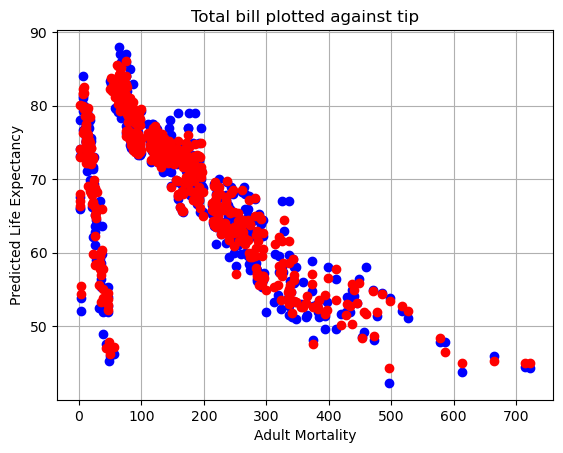

In [92]:
# Visualizacion de resultados
import matplotlib.pyplot as plt

plt.figure() 
plt.title('Total bill plotted against tip') 
plt.xlabel('Adult Mortality') 
plt.ylabel('Predicted Life Expectancy') 
plt.plot(X_test.adult_mortality	, y_test, 'bo') 

plt.plot(X_test.adult_mortality	, y_predict, 'ro') 
#plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()